## Critical Exponent Calculation

Here we calculate the $\alpha$ and $\nu$ critical exponents by finding maxima in the specific heat and susceptability respectively of a system of size N. We could also calculate $\gamma$, but that one doesn't seem to work so well with lower N data points, and increasing N is computationally expensive. This isn't really an issue, since we can calculate the other critical exponents via universality classes using just 2.

### Results

We find the following values for our critical exponents:

$$ \alpha = 0.0660 $$
$$ \nu = 1.297 $$

The expected values for these are:

$$ \alpha = 0 $$
$$ \nu = 1 $$

So we didn't do too bad! The $\nu$ value is especially close to the expected one, and although the $\alpha$ isn't perfect, it's the same order of magnitude. The method seems prone to issues when using moderately large N (>25), which means we have to keep all of our values low for the results to be coherent.

### Code

In [2]:
# The usual suspects
import numpy as np
import matplotlib.pyplot as plt
# For fitting our graphs
from scipy.stats import linregress

# My own py files containing most of the methods
import Ising # This one's got general Ising stuff
import Simulations # This one simulates the model to get chi and C

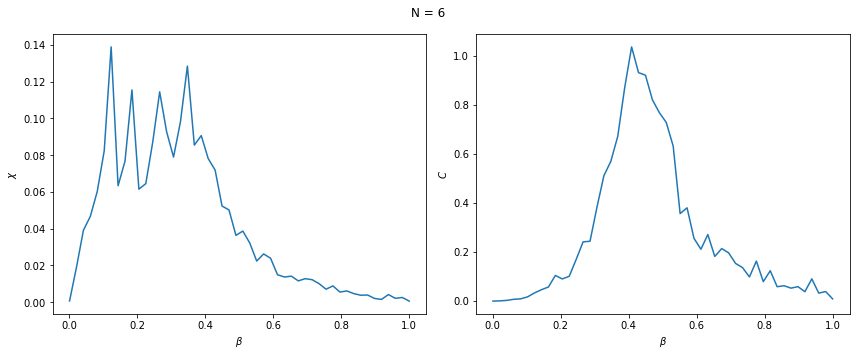

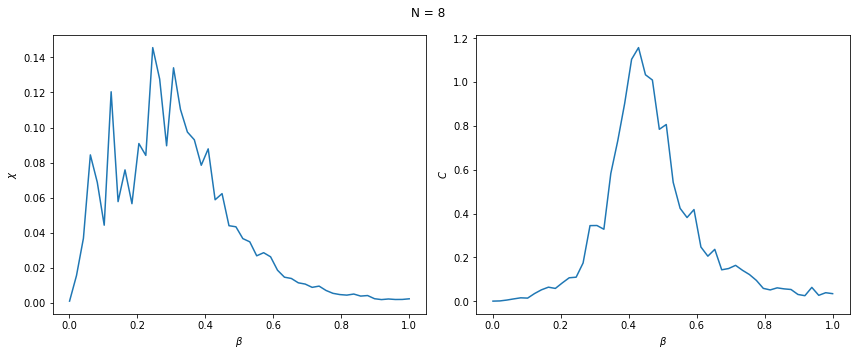

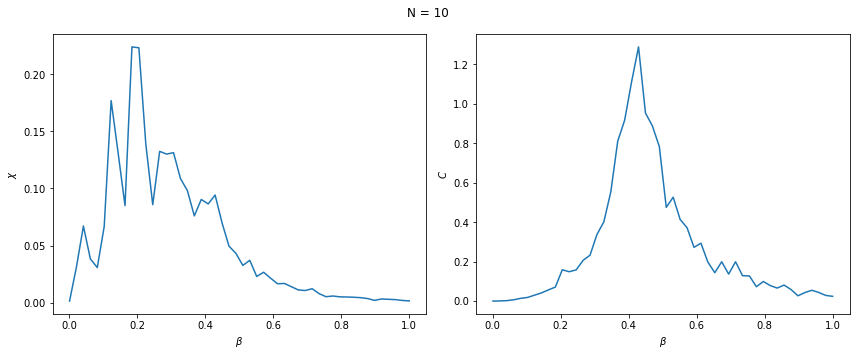

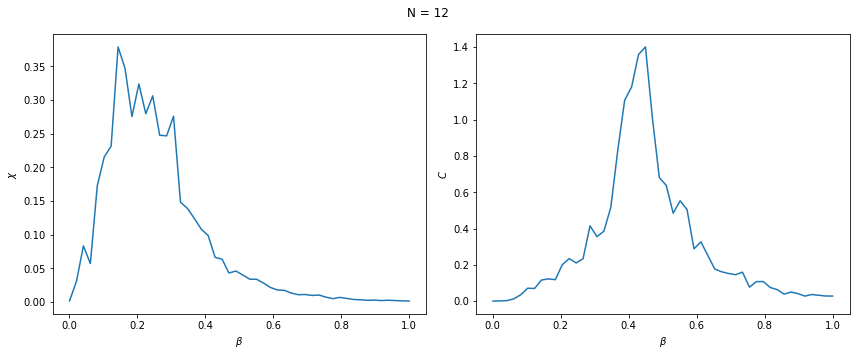

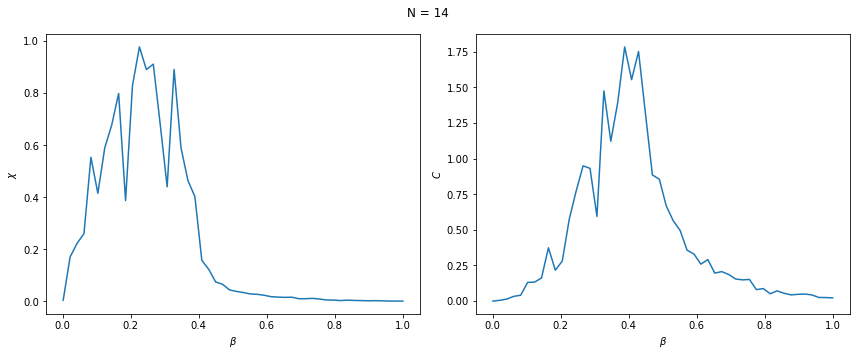

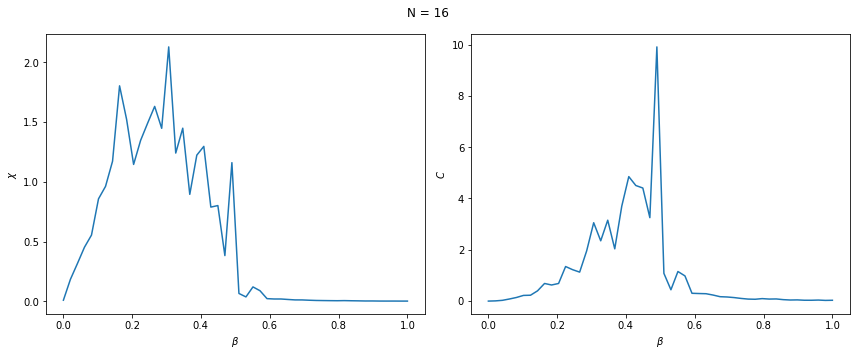

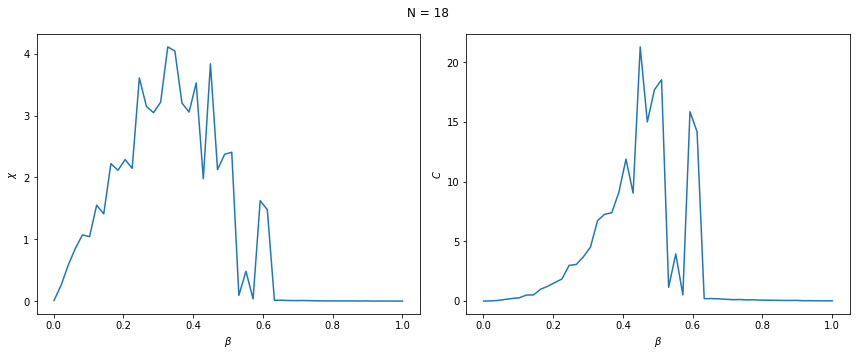

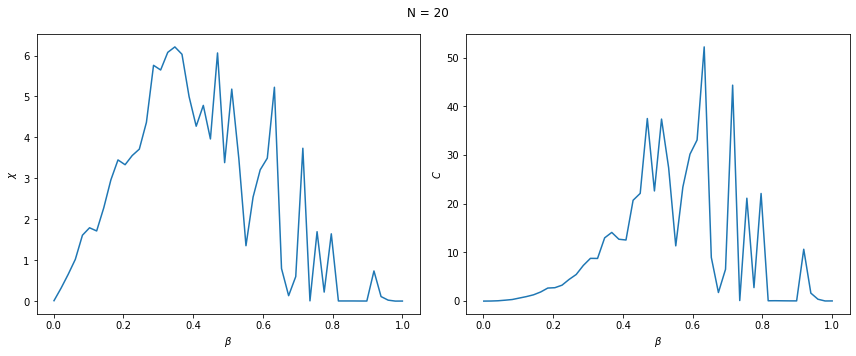

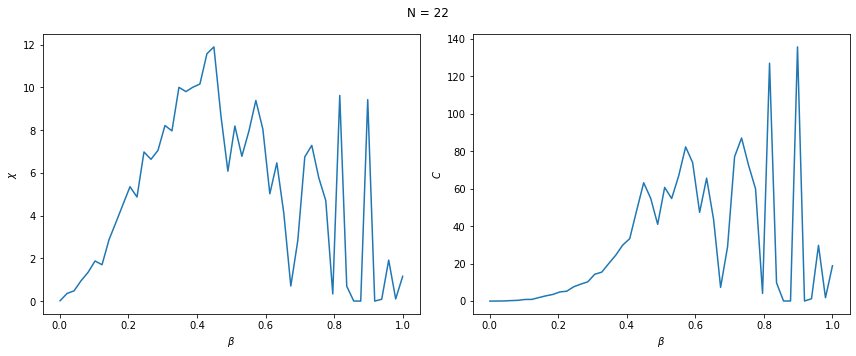

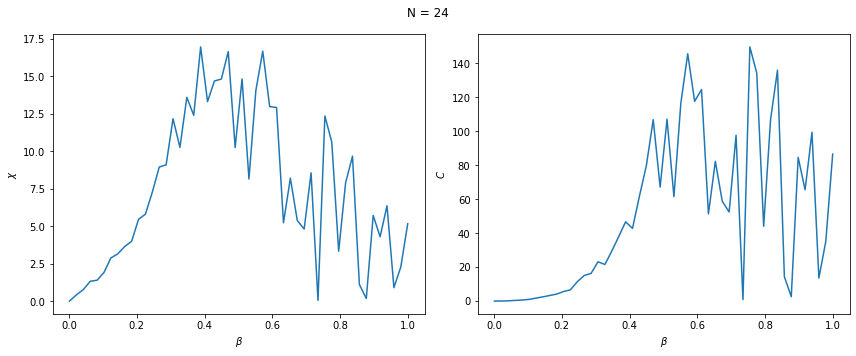

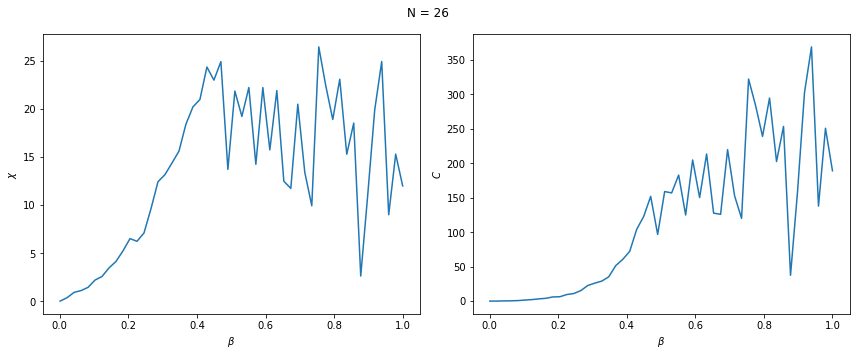

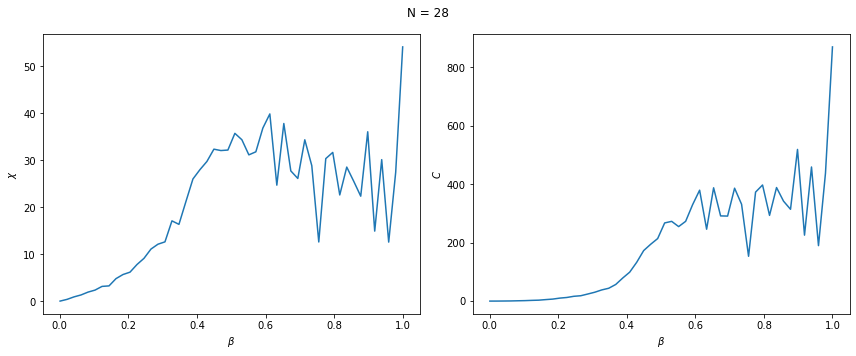

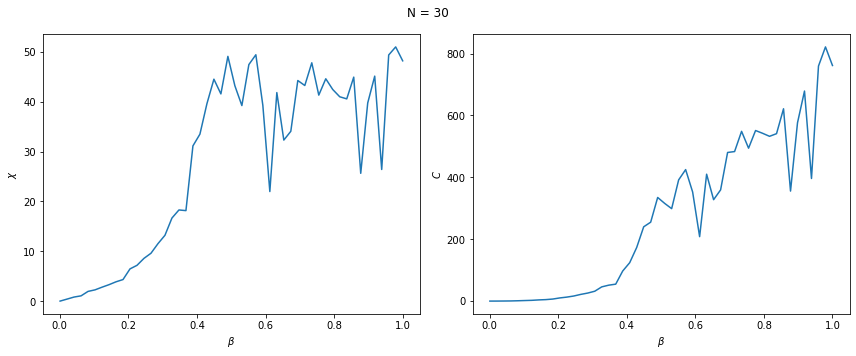

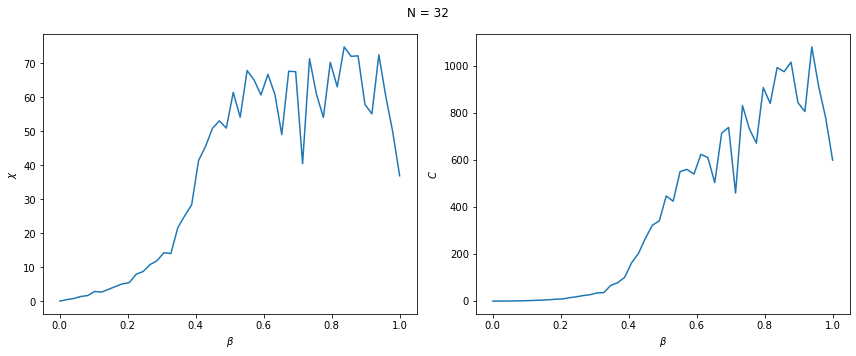

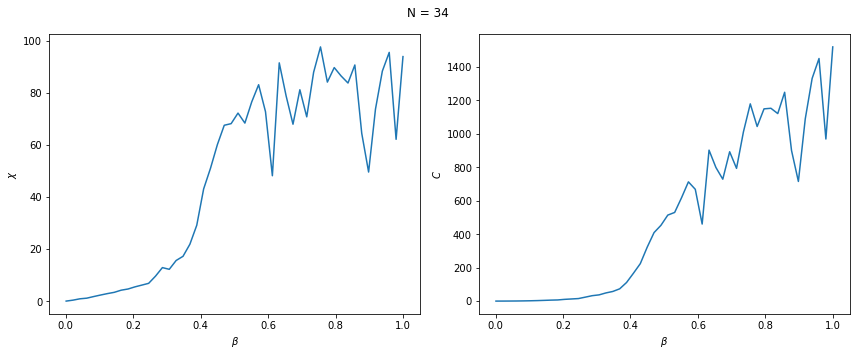

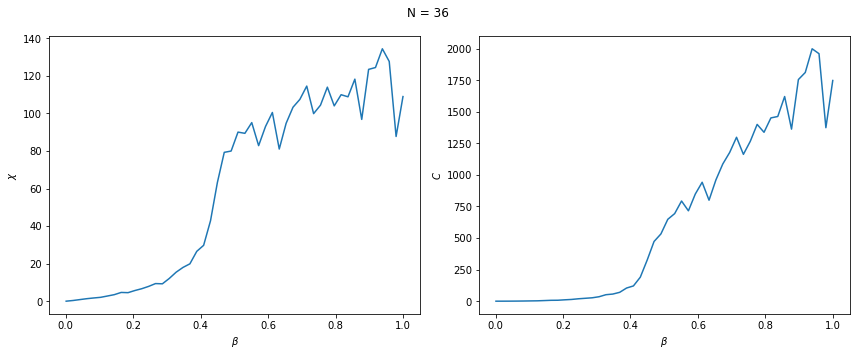

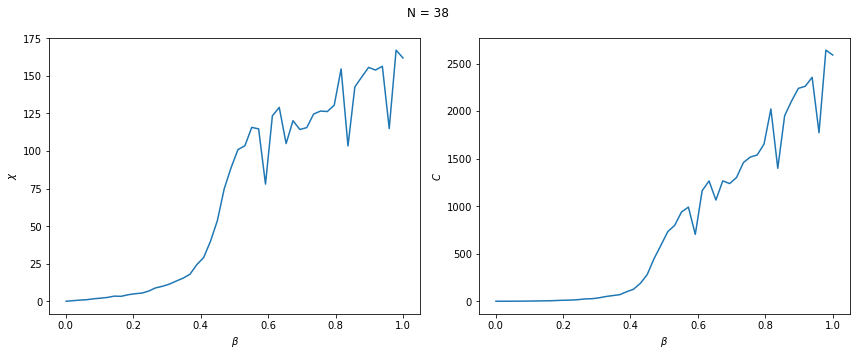

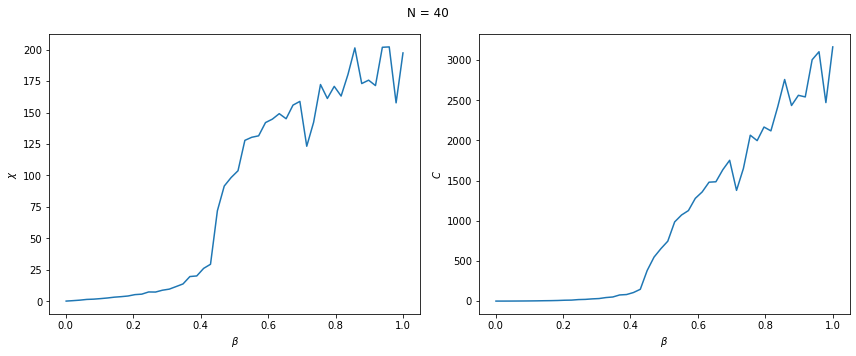

nan
1.920004039737945


<ipython-input-5-8f16956976d9>:54: RuntimeWarning: invalid value encountered in log
  slope, intercept, r, p, a = linregress(np.log(NArr), np.log(tMaxChiArr))


In [5]:
# We can keep N pretty low since computation times get out of hand
# pretty quickly
#NArr = [6, 8, 10, 12, 14, 16, 18, 20]
NArr = np.arange(6, 42, 2)

# Create an array of beta and later convert to T so that
# they are nicely spaced around the critical point
betaArr = np.linspace(1e-3, 1, 50)

# As promised
TArr = 1/betaArr
criticalTemp = 2/np.log(1 + np.sqrt(2))
criticalBeta = 1/criticalTemp
tArr = (TArr - criticalTemp) / criticalTemp

chiArr = np.zeros(len(NArr))
cArr = np.zeros(len(NArr))
tMaxCArr = np.zeros(len(NArr))
tMaxChiArr = np.zeros(len(NArr))

for i in range(len(NArr)):
    # For plotting the chi and c graphs to visually identify the maxima
    # and qualitatively validating the trial
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Where we record the chi and c array for each beta (temperature)
    tempChiArr = np.zeros(len(betaArr))
    tempCArr = np.zeros(len(betaArr))
    
    # See Simulations.py for more info on getting observables
    for j in range(len(betaArr)):
        tempCArr[j], tempChiArr[j] = Simulations.calculateObservables(NArr[i], 1/betaArr[j], simulationSteps=200, skipSweeps=2)
        
    # Visualize!
    ax[0].plot(betaArr, tempChiArr)
    ax[0].set_xlabel(r'$\beta$')
    ax[0].set_ylabel(r'$\chi$')
    
    ax[1].plot(betaArr, tempCArr)
    ax[1].set_xlabel(r'$\beta$')
    ax[1].set_ylabel(r'$C$')
    
    fig.suptitle(f'N = {NArr[i]}')
    fig.tight_layout()
    plt.show()
    
    # Now we determine the max of the graphs and save things
    cArr[i] = max(tempCArr)
    tMaxCArr[i] = tArr[np.where(tempCArr == cArr[i])]
    chiArr[i] = max(tempChiArr)
    tMaxChiArr[i] = tArr[np.where(tempChiArr == chiArr[i])]
        
# Calculate the nu critical exponent via locations of susceptability maxima
slope, intercept, r, p, a = linregress(np.log(NArr), np.log(tMaxChiArr))
nu = -1/slope
print(nu) # Expected value here is 1

# Calcuate the alpha critical exponent via locations of specific heat maxima
slope, intercept, r, p, a = linregress(np.log(NArr), np.log(abs(tMaxCArr)))
alpha = slope
print(alpha) # Expected value here is 0

-0.02221833288874899
0.6185317037552153
0.7824438258693142


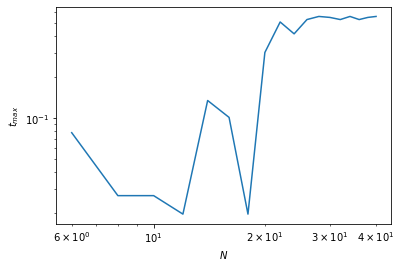

In [19]:
# We want to fit ln(t_max) (for chi) vs ln(N)
# Check what the data looks like on a log scale plot
plt.plot(NArr, abs(tMaxCArr))
plt.xlabel(r'$N$')
plt.ylabel(r'$t_{max}$')
plt.xscale('log')
plt.yscale('log')
crop = 8

print(np.mean(tMaxCArr[0:8]))

# Calculate the nu critical exponent via locations of susceptability maxima
slope, intercept, r, p, a = linregress(np.log(NArr)[0:crop], np.log(abs(tMaxChiArr))[0:crop])
nu = -1/slope
print(nu) # Expected value here is 1

# Calcuate the alpha critical exponent via locations of specific heat maxima
slope, intercept, r, p, a = linregress(np.log(NArr[0:crop]), np.log(abs(tMaxCArr)[0:crop]))
alpha = slope
print(alpha) # Expected value here is 0

#slope, intercept, r, p, a = linregress(-nu * np.log(tMaxChiArr), 1/nu * np.log(NArr))
#print(slope)